In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import mesa_reader as mr

In [3]:
mearth = 5.97e27
msun = 1.9892e33
rearth = 6.371008e8
rsun = 6.9598e10
rfrac = rsun/rearth
mfrac = msun/mearth

In [4]:
def formatstring(myfloat):
    return '%.5f'%myfloat

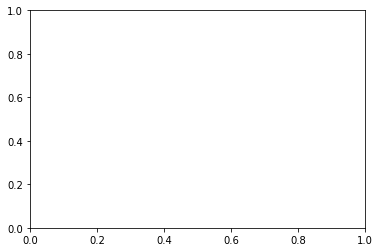

In [5]:
plt.figure()
ax = plt.gca()

In [6]:
mpList = list(np.linspace(7.0,8.0,11))
for i, m in enumerate(mpList):
    mpList[i] = formatstring(m)

In [7]:
fList1 = list(np.logspace(-4,np.log10(2*(10**-2)),10))
fList2 = list(np.linspace(0.02,0.05,7))
fList3 = list((0.0198,0.02,0.022,0.024))
for i, f in enumerate(fList1):
    fList1[i] = formatstring(f)
for i, f in enumerate(fList2):
    fList2[i] = formatstring(f)
for i, f in enumerate(fList3):
    fList3[i] = formatstring(f)
     
fList = fList1 + fList2
#print(fList1)
#print(fList2)

In [8]:
entropyList = [7.28,7.28,7.29,7.29,7.3,7.3,7.3,7.31,7.31,7.32,7.32]
for i, ent in enumerate(entropyList):
    entropyList[i] = formatstring(ent)

In [9]:
def envelope_fraction(history):
    return history.envelope_mass/(history.star_mass*msun)

def calcX(history):
    return history.Hydrogen_Mass / history.envelope_mass

def calcY(history):
    return history.He4_Mass / history.envelope_mass

def calcZ(history):    
    return 1 - calcX(history) - calcY(history)

def deltaf(history):
    initf = history.envelope_mass[0] / (history.star_mass[0] * msun)
    finf = history.envelope_mass[-1] / (history.star_mass[-1] * msun)
    return finf - initf 

def deltam(history):
    initm = history.star_mass[0] * mfrac
    finm = history.star_mass[-1] * mfrac
    return finm - initm

In [14]:
for i, m in enumerate(mpList):
    ent = entropyList[i]
    
    for j, f in enumerate(fList):
        h = mr.MesaData('data/biggrid/hist_evolve_%s_%s_0.24000_0.02000_0.03392_%s_0.10000.data'%(m,f,ent) ,file_type='log')

        #plt.subplot(4, 3, i+1)
        #plt.plot(h.star_mass[-1]*mfrac,h.envelope_mass[-1]/(h.star_mass[-1]*msun),marker='.',color='b')
        
plt.gcf().set_dpi(300)
#ax.set_xlabel('time, Gyr')
#ax.set_ylabel('envelope fraction')
#ax.set_yscale('log')

<Figure size 1800x1200 with 0 Axes>

In [15]:
masses1 = [] 
radii1 = [] 
fs1 = []
deltams1 = []
deltafs1 = []
ages1 = []

masses2 = [] 
radii2 = [] 
fs2 = []
deltams2 = []
deltafs2 = []
ages2 = []

newmasses = []
newradii = [] 
newfs = []
newdeltams = []
newdeltafs = []
newages = []

for i, m in enumerate(mpList):
    ent = entropyList[i]
    
    for j, f in enumerate(fList1):
        h = mr.MesaData('data/biggrid/hist_evolve_%s_%s_0.24000_0.02000_0.03392_%s_0.10000.data'%(m,f,ent),file_type='log')
        
        masses1.append(h.star_mass*mfrac)
        radii1.append(h.radius*rfrac)
        fs1.append(envelope_fraction(h))
        
        deltams1.append(deltam(h))
        deltafs1.append(deltaf(h))
        ages1.append(h.star_age[-1])
        
    for j, f in enumerate(fList2):
        h = mr.MesaData('data/biggrid/hist_evolve_%s_%s_0.24000_0.02000_0.03392_%s_0.10000.data'%(m,f,ent),file_type='log')
        
        masses2.append(h.star_mass*mfrac)
        radii2.append(h.radius*rfrac)
        fs2.append(envelope_fraction(h))
        
        deltams2.append(deltam(h))
        deltafs2.append(deltaf(h))
        ages2.append(h.star_age[-1])
        
    for j, f in enumerate(fList):
        h = mr.MesaData('data/regrid_mar3/hist_evolve_%s_%s_0.24000_0.02000_0.03392_%s_0.10000.data'%(m,f,ent),file_type='log')
        
        newmasses.append(h.star_mass*mfrac)
        newradii.append(h.radius*rfrac)
        newfs.append(envelope_fraction(h))
        
        newdeltams.append(deltam(h))
        newdeltafs.append(deltaf(h))
        newages.append(h.star_age[-1])

#N_planets x N_timesteps:
masses = masses1 + masses2 
radii = radii1 + radii2
fs = fs1 + fs2
#N-planets
deltams = deltams1 + deltams2 
deltafs = deltafs1 + deltafs2
ages = ages1 + ages2
#print(len(masses))
#print(len(newmasses))

In [16]:
print(len(masses[0]))
print(len(newmasses[0]))

2543
374


In [17]:
masses3 = [] 
radii3 = [] 
fs3 = []
deltams3 = []
deltafs3 = []
ages3 = []

for i, m in enumerate(mpList):
    ent = entropyList[i]
    
    for j, f in enumerate(fList3):
        #print('data/newgrid/hist_evolve_%s_%s_0.24000_0.02000_0.03392_%s_0.10000.data'%(m,f,ent))
        h = mr.MesaData('data/newgrid/hist_evolve_%s_%s_0.24000_0.02000_0.03392_%s_0.10000.data'%(m,f,ent),file_type='log')
        
        masses3.append(h.star_mass*mfrac)
        radii3.append(h.radius*rfrac)
        fs3.append(envelope_fraction(h))
        
        deltams3.append(deltam(h))
        deltafs3.append(deltaf(h))
        ages3.append(h.star_age[-1])
        

In [18]:
min(np.hstack(fs))

1.98531174327598e-18

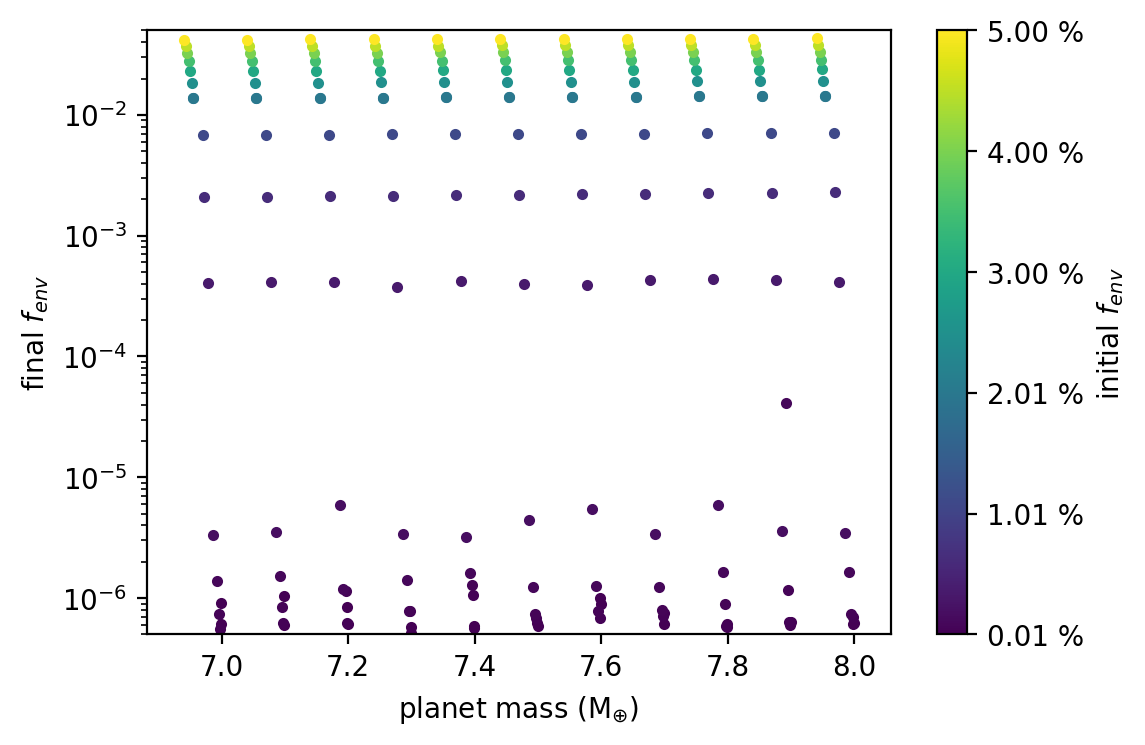

In [20]:
cmap = plt.get_cmap('viridis')

absmin = 1e-4 #np.min(np.hstack(fs))
absmax = np.max(np.hstack(fs))

for i in range(0,len(fs)):
    thiscolor = (fs[i][0] - absmin)/(absmax - absmin)
    thiscolor = np.max(thiscolor,0)
    plt.scatter(masses[i][-1],fs[i][-1],marker='.',color=cmap(thiscolor))
        
plt.gcf().set_dpi(200)
plt.gca().set_yscale('log')
plt.gca().set_ylim(5e-7,5e-2)
plt.gca().set_xlabel('planet mass (M$_{\oplus}$)')
plt.gca().set_ylabel('final $f_{env}$')

cbar = plt.colorbar()
ticks = cbar.get_ticks()
cbar.set_ticks(ticks)
labels = ticks * (absmax-absmin) + absmin
labels = ['%.2f %%'%(label * 100) for label in labels]
cbar.set_ticklabels(labels)
cbar.set_label('initial $f_{env}$')

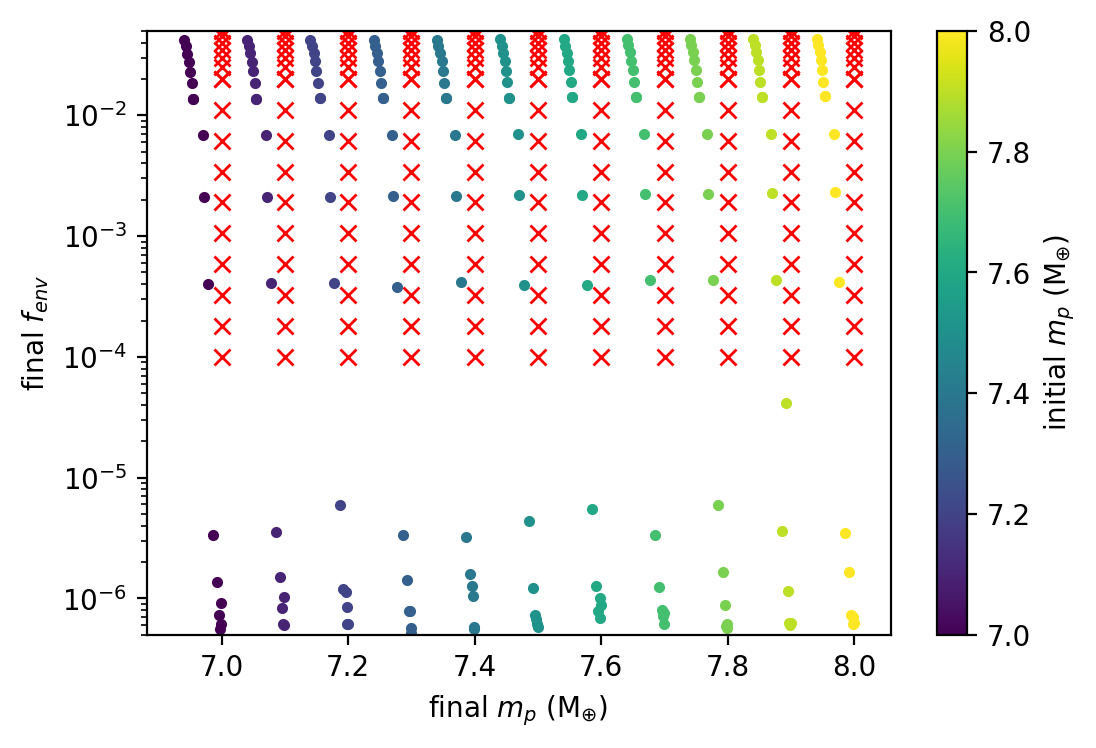

In [21]:
for i in range(0,len(masses)):
    thiscolor = (masses[i][0] - 7.0)/(1.0)
    thiscolor = np.max(thiscolor,0)
    plt.scatter(masses[i][-1],fs[i][-1],marker='.',color=cmap(thiscolor))
    plt.plot(masses[i][0],fs[i][0],marker='x',color='red')
        
plt.gcf().set_dpi(200)
plt.gca().set_yscale('log')
plt.gca().set_ylim(5e-7,5e-2)
plt.gca().set_xlabel('final $m_p$ (M$_{\oplus}$)')
plt.gca().set_ylabel('final $f_{env}$')

cbar = plt.colorbar()
ticks = cbar.get_ticks()
cbar.set_ticks(ticks)
cbar.set_ticklabels([7.0,7.2,7.4,7.6,7.8,8.0])
cbar.set_label('initial $m_p$ (M$_{\oplus}$)')

In [23]:
logabsmin = np.log10(absmin)
logabsmax = np.log10(absmax)

Text(0, 0.5, '$\\Delta f_{env} / f_{env}$')

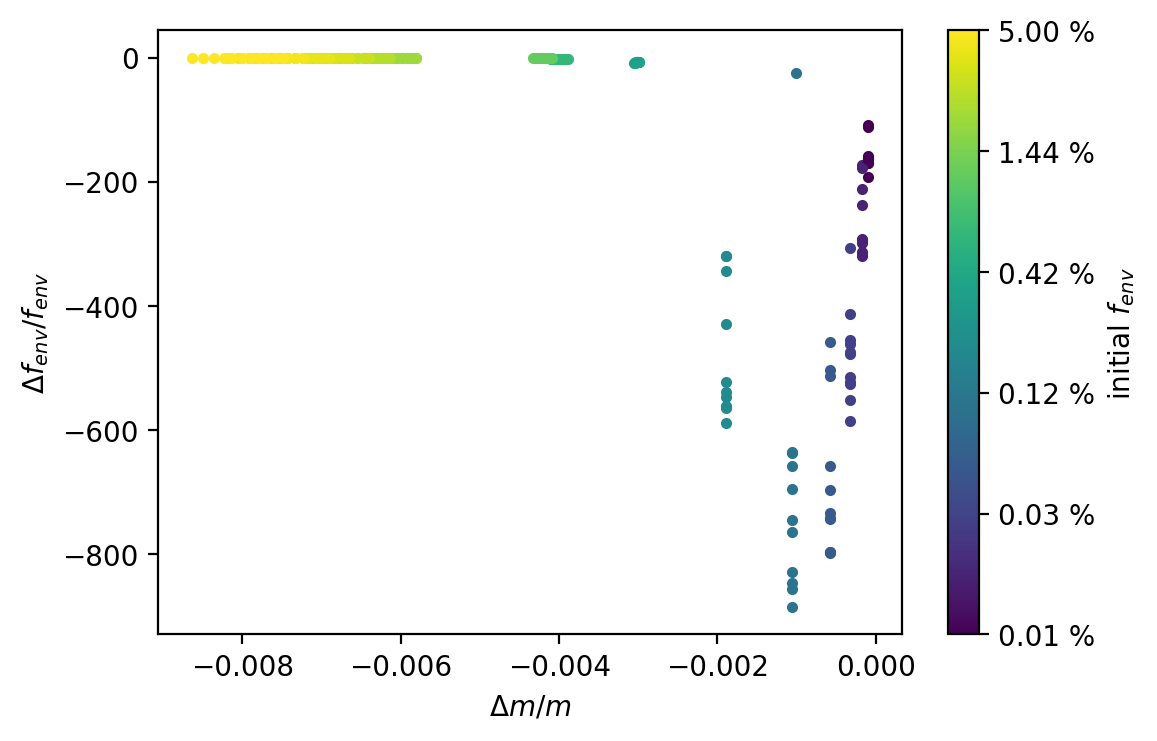

In [24]:
for i in range(0,len(fs)):
    thiscolor = (np.log10(fs[i][0]) - logabsmin)/(logabsmax - logabsmin)
    thiscolor = np.max(thiscolor,0)
    #plt.plot(deltams[i],deltafs[i],'.',c=cmap(thiscolor))
    plt.plot(deltams[i]/masses[i][-1],deltafs[i]/fs[i][-1],'.',c=cmap(thiscolor))
    
plt.scatter([],[])
    
plt.gcf().set_dpi(200)   
#plt.gca().set_ylim(-0.006,0)
cbar = plt.colorbar()
ticks = cbar.get_ticks()
cbar.set_ticks(ticks)
labels = ticks * (logabsmax-logabsmin) + logabsmin
labels = ['%.2f %%'%(10**label * 100) for label in labels]
cbar.set_ticklabels(labels)
cbar.set_label('initial $f_{env}$')

plt.gca().set_xlabel('$\Delta m / m $')
plt.gca().set_ylabel('$\Delta f_{env} / f_{env}$')

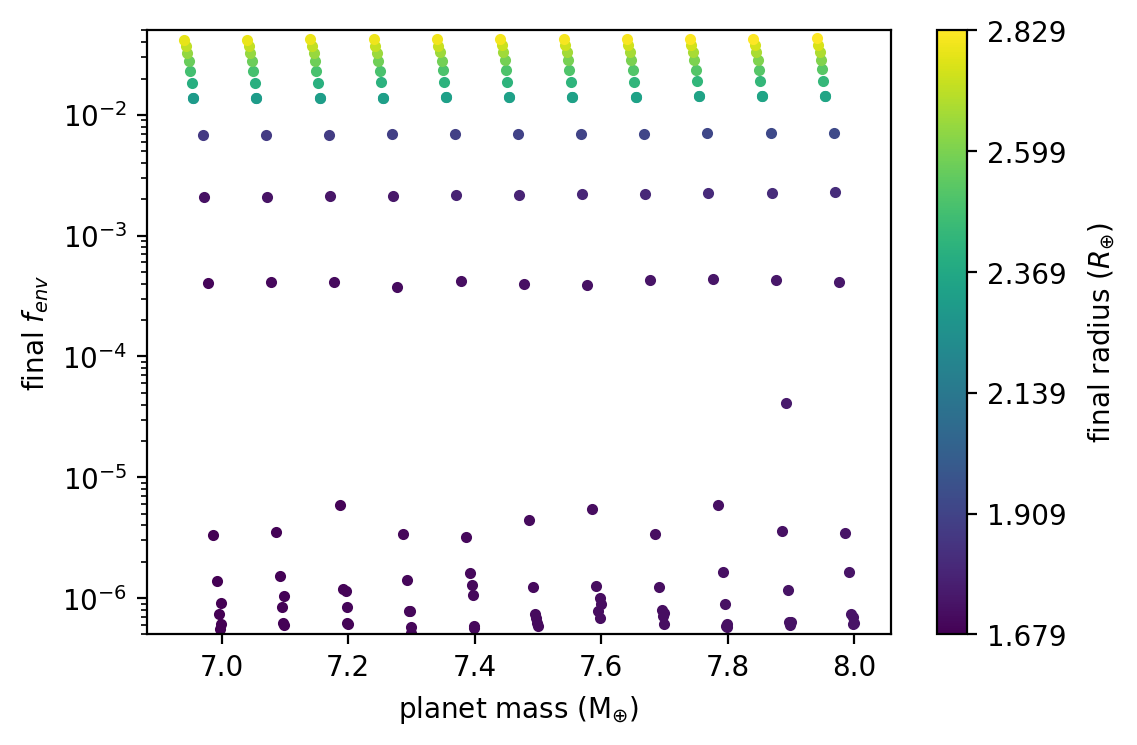

In [25]:
finradii = []
for i in range(0,len(radii)):
    finradii.append(radii[i][-1])
    
rabsmin = np.min(finradii)
rabsmax = np.max(finradii)    
    
for i in range(0,len(radii)):
    thiscolor = (finradii[i] - rabsmin)/(rabsmax - rabsmin)
    plt.scatter(masses[i][-1],fs[i][-1],marker='.',color=cmap(thiscolor))
        
plt.gcf().set_dpi(200)
plt.gca().set_yscale('log')
plt.gca().set_ylim(5e-7,5e-2)
plt.gca().set_xlabel('planet mass (M$_{\oplus}$)')
plt.gca().set_ylabel('final $f_{env}$')

cbar = plt.colorbar()
ticks = cbar.get_ticks()
cbar.set_ticks(ticks)
labels = ticks * (rabsmax-rabsmin) + rabsmin
labels = ['%.3f '%(label) for label in labels]
cbar.set_ticklabels(labels)
cbar.set_label('final radius ($R_{\oplus}$)')

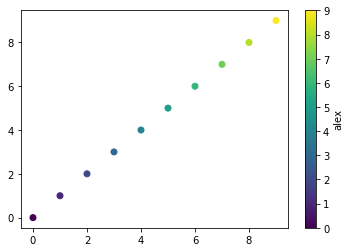

In [50]:
colors = ['red']*10
#colors[2] = cmap(0.8)
plt.scatter(range(10),range(10),c=range(10))
cbar = plt.colorbar()

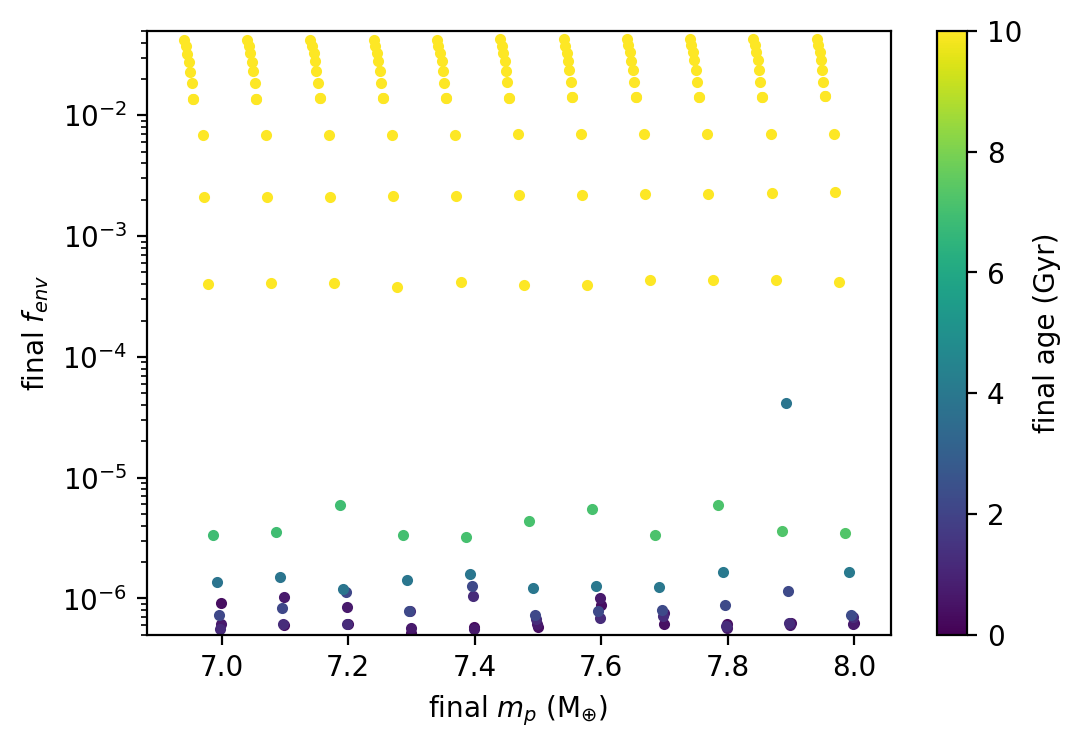

In [26]:
for i in range(0,len(masses)):
    thiscolor = (ages[i]) / (1e10)
    thiscolor = np.max(thiscolor,0)
    plt.scatter(masses[i][-1],fs[i][-1],marker='.',color=cmap(thiscolor))
        
plt.gcf().set_dpi(200)
plt.gca().set_yscale('log')
plt.gca().set_ylim(5e-7,5e-2)
plt.gca().set_xlabel('final $m_p$ (M$_{\oplus}$)')
plt.gca().set_ylabel('final $f_{env}$')

cbar = plt.colorbar()
ticks = cbar.get_ticks()
cbar.set_ticks(ticks)
cbar.set_ticklabels([0,2,4,6,8,10])
cbar.set_label('final age (Gyr)')

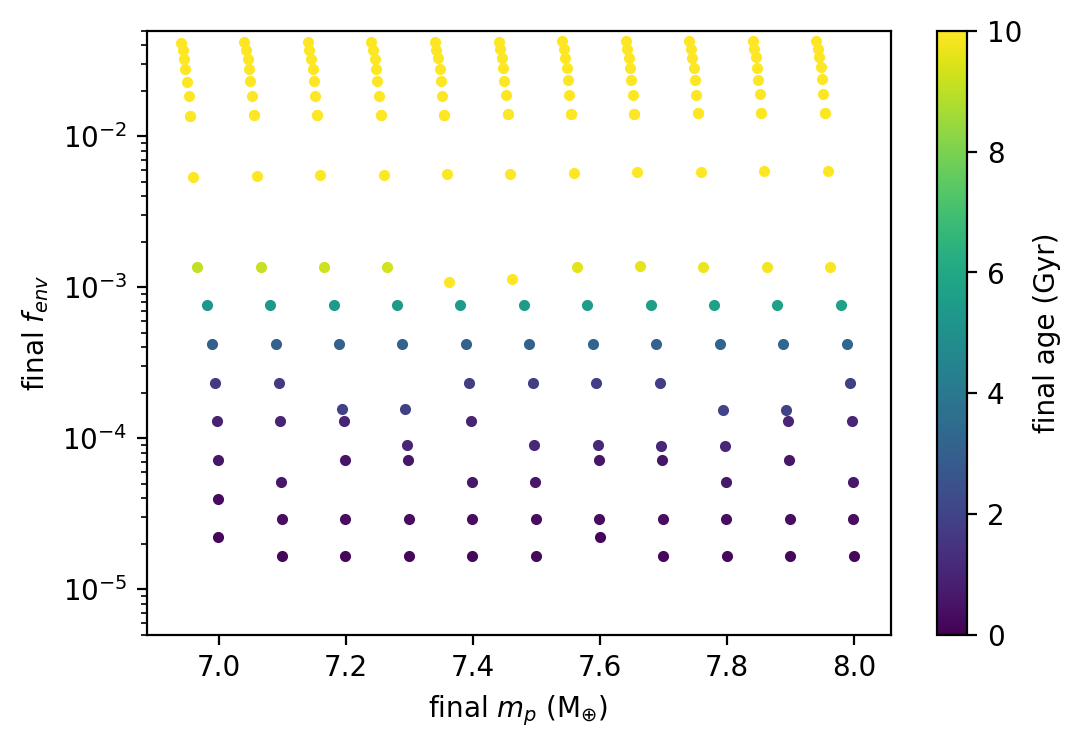

In [27]:
for i in range(0,len(newmasses)):
    thiscolor = (newages[i]) / (1e10)
    thiscolor = np.max(thiscolor,0)
    plt.scatter(newmasses[i][-1],newfs[i][-1],marker='.',color=cmap(thiscolor))
        
plt.gcf().set_dpi(200)
plt.gca().set_yscale('log')
plt.gca().set_ylim(5e-6,5e-2)
plt.gca().set_xlabel('final $m_p$ (M$_{\oplus}$)')
plt.gca().set_ylabel('final $f_{env}$')

cbar = plt.colorbar()
ticks = cbar.get_ticks()
cbar.set_ticks(ticks)
cbar.set_ticklabels([0,2,4,6,8,10])
cbar.set_label('final age (Gyr)')

(6.887086733361134, 8.052296213499277)
(1.6218472596443287, 2.886969765995583)


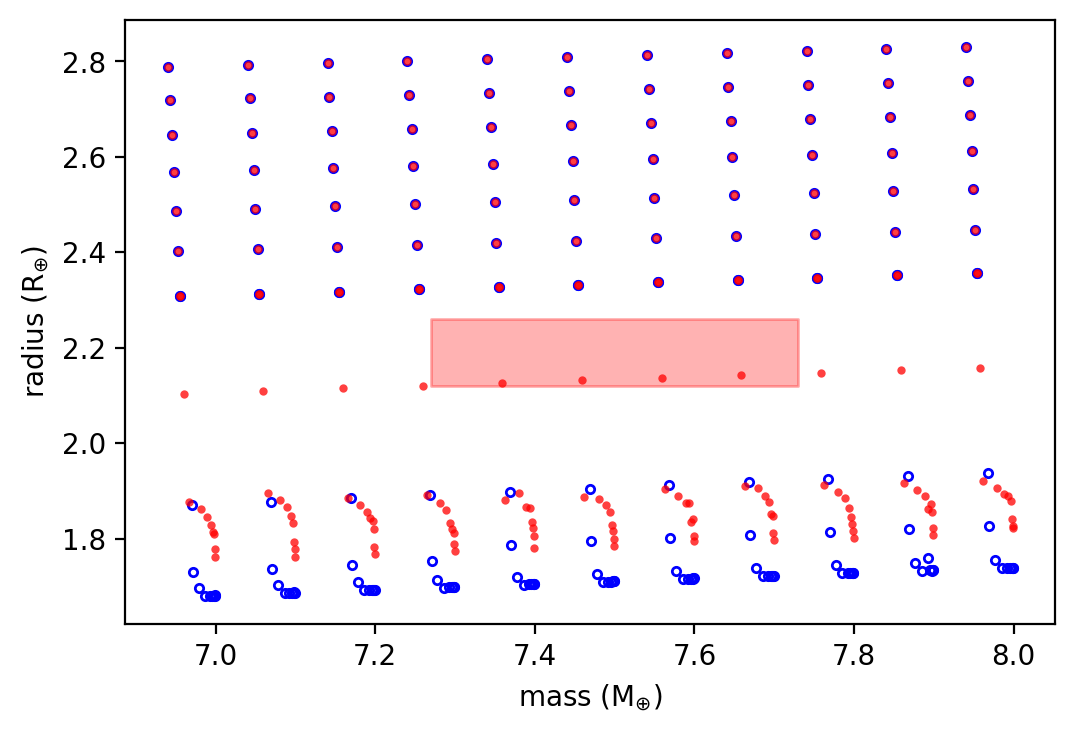

In [422]:
figmr = plt.figure()
axmr = plt.gca()

for i in range(0,len(masses)):
    plt.plot(masses[i][-1],radii[i][-1],'b.',fillstyle='none',zorder=1,)
    plt.plot(newmasses[i][-1],newradii[i][-1],'r.',zorder=2,alpha=0.75,markeredgewidth=0)


figmr.set_dpi(200)    
axmr.set_xlabel('mass (M$_{\oplus}$)')
axmr.set_ylabel('radius (R$_{\oplus}$)')

#mass 7.50 +- 0.23
#radius 2.19 +- 0.07
#mass min 7.27 radius min 2.12
#mass max 7.73 radius max 2.26
#width = 2 * 0.23 = 0.46
#height = 2* 0.07 = 0.14
#rect = patches.Rectangle((7.27,2.12),0.46,0.14,linewidth=1)
#axmr.add_patch(rect)

meas_m = 7.50
delta_meas_m = 0.23
meas_r = 2.19
delta_meas_r = 0.07
axmr.fill_between([meas_m - delta_meas_m, meas_m + delta_meas_m],meas_r - delta_meas_r,meas_r + delta_meas_r,
                  color='red',alpha=0.3)
#axmr.fill_between([meas_m - 2*delta_meas_m, meas_m + 2*delta_meas_m],meas_r - 2*delta_meas_r, meas_r + 2*delta_meas_r,
                  #color='red',alpha=0.2)
#axmr.fill_between([meas_m - 3*delta_meas_m, meas_m + 3*delta_meas_m],meas_r - 3*delta_meas_r, meas_r + 3*delta_meas_r,
                  #color='red',alpha=0.1)
print(axmr.get_xlim())
print(axmr.get_ylim())

In [378]:
#dir(cbar)

17
